In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import os
from datetime import timedelta
import copy
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('../norm_data.csv')
display(df)

,Unnamed: 0,timestamp,avg_energy,num_houses,is_holiday,visibility,temperature,dewPoint,pressure,windSpeed,precipType,humidity,hour_minute,month,day,year,is_weekday
0,0,2011-11-23 09:00:00+00:00,0.496932,2.0,0,0.259284,0.275064,0.490958,0.762907,0.118345,0,0.979768,0.382979,0.909091,0.733333,0.0,1
1,1,2011-11-23 09:30:00+00:00,0.486617,2.0,0,0.300829,0.284254,0.504870,0.766126,0.121289,0,0.982632,0.404255,0.909091,0.733333,0.0,1
2,2,2011-11-23 10:00:00+00:00,0.158681,6.0,0,0.372542,0.298686,0.517080,0.768527,0.132376,0,0.966876,0.425532,0.909091,0.733333,0.0,1
3,3,2011-11-23 10:30:00+00:00,0.015988,6.0,0,0.496269,0.323540,0.521713,0.768571,0.155500,0,0.904222,0.446809,0.909091,0.733333,0.0,1
4,4,2011-11-23 11:00:00+00:00,0.047670,7.0,0,0.614973,0.349342,0.526457,0.766900,0.177141,0,0.837959,0.468085,0.909091,0.733333,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39722,39722,2014-02-27 22:00:00+00:00,0.536284,4986.0,0,0.847610,0.255642,0.389149,0.443133,0.201194,0,0.786392,0.936170,0.090909,0.866667,1.0,1
39723,39723,2014-02-27 22:30:00+00:00,0.498642,4987.0,0,0.843370,0.251805,0.388935,0.435741,0.193313,0,0.798160,0.957447,0.090909,0.866667,1.0,1
39724,39724,2014-02-27 23:00:00+00:00,0.413828,4987.0,0,0.849446,0.251180,0.388145,0.427603,0.183154,0,0.799284,0.978723,0.090909,0.866667,1.0,1
39725,39725,2014-02-27 23:30:00+00:00,0.318439,4987.0,0,0.808383,0.250244,0.387023,0.419580,0.175031,0,0.797509,1.000000,0.090909,0.866667,1.0,1


In [ ]:
df.plot(x='timestamp', y='avg_energy', figsize=(20,10))

In [ ]:
df['timestamp']

In [19]:
# create a new dataset that does not have the last 48 rows
df_X = df[:-48]
# create a new dataset that does not have the first 48 rows
df_y = df[48:]

# make them
# send both to to numpy arrays with out the timestamp or year
X = df_X.drop(['timestamp', 'year'], axis=1).to_numpy()
y = df_y.drop(['timestamp', 'year'], axis=1).to_numpy()
del df_X
del df_y
#
train_percent = 0.8
train_size = int(len(X) * train_percent)
test_size = len(X) - train_size
# split into train and test sets
train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]
train_y, test_y = y[0:train_size,:], y[train_size:len(y),:]

/tmp/ipykernel_54867/3853721576.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Emedding[:, 0], Emedding[:, 1], c='grey', cmap='Spectral', s=2)


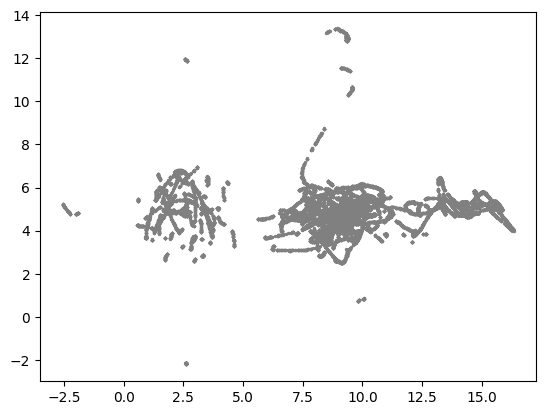

In [43]:
import umap
Emedding = umap.UMAP(n_neighbors=11, n_components=len(df.columns)-2, min_dist=0.01, metric='correlation').fit_transform(train_X)
plt.scatter(Emedding[:, 0], Emedding[:, 1], c='grey', cmap='Spectral', s=2)